 Original Data:


/tmp/ipython-input-2053658726.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2021-01-01', periods=24, freq='M'),


,Date,Sales,Customers
0,2021-01-31,100.00,20.00
1,2021-02-28,120.00,22.00
2,2021-03-31,NaN,21.00
3,2021-04-30,130.00,23.00
4,2021-05-31,150.00,NaN



 Missing Values Before Imputation:


,0
Date,0
Sales,5
Customers,4



 After Missing Value Imputation:


/tmp/ipython-input-2053658726.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sales'].fillna(df['Sales'].median(), inplace=True)
/tmp/ipython-input-2053658726.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

,Date,Sales,Customers
0,2021-01-31,100.00,20.00
1,2021-02-28,120.00,22.00
2,2021-03-31,430.00,21.00
3,2021-04-30,130.00,23.00
4,2021-05-31,150.00,50.80



 After Normalization:


,Sales,Customers,Sales_norm,Customers_norm
0,100.00,20.00,0.00,0.00
1,120.00,22.00,0.05,0.04
2,430.00,21.00,0.79,0.02
3,130.00,23.00,0.07,0.05
4,150.00,50.80,0.12,0.56


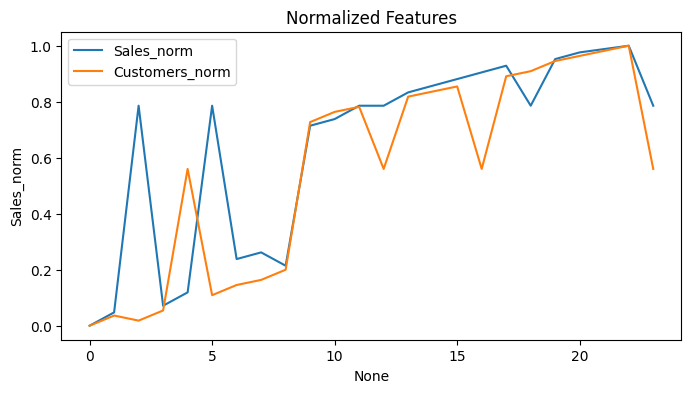


⚠️ Outlier Locations:
(array([], dtype=int64), array([], dtype=int64))


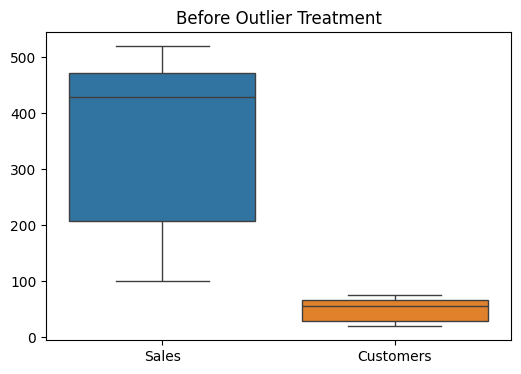

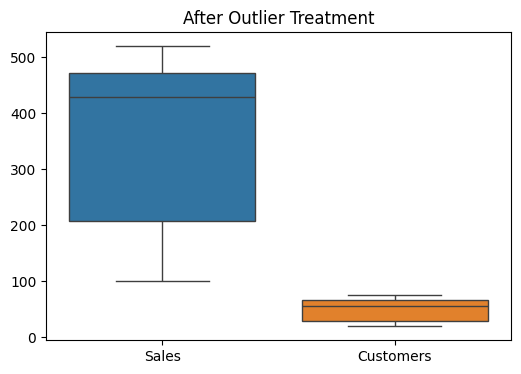


 After Outlier Treatment:


,Sales,Customers
0,100.00,20.00
1,120.00,22.00
2,430.00,21.00
3,130.00,23.00
4,150.00,50.80


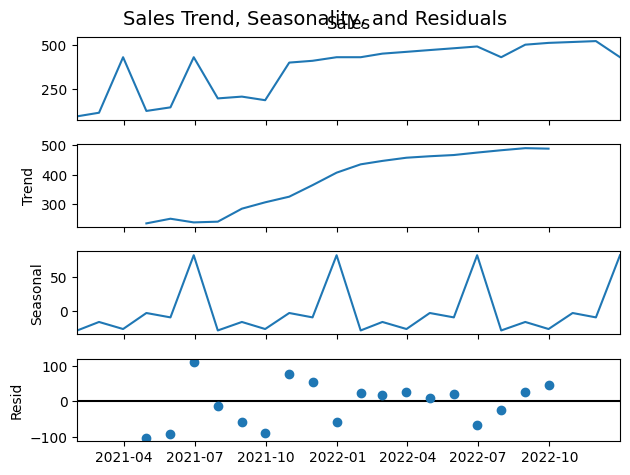


 After Trend & Seasonality Treatment:


,Sales,Sales_detrended,Sales_deseasonalized
Date,,,
2021-01-31,100.00,NaN,128.08
2021-02-28,120.00,NaN,135.72
2021-03-31,430.00,NaN,456.00
2021-04-30,130.00,-105.00,132.66
2021-05-31,150.00,-100.83,159.05


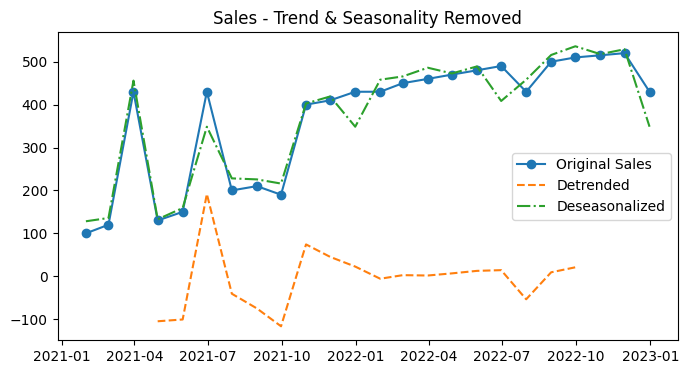


🏁 Final Preprocessed Data:


,Sales,Customers,Sales_norm,Customers_norm,Sales_detrended,Sales_deseasonalized
Date,,,,,,
2021-01-31,100.00,20.00,0.00,0.00,NaN,128.08
2021-02-28,120.00,22.00,0.05,0.04,NaN,135.72
2021-03-31,430.00,21.00,0.79,0.02,NaN,456.00
2021-04-30,130.00,23.00,0.07,0.05,-105.00,132.66
2021-05-31,150.00,50.80,0.12,0.56,-100.83,159.05


In [ ]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# ==========================================================
# STEP 1: LOAD / CREATE SAMPLE DATASET
# ==========================================================

data = {
    'Date': pd.date_range(start='2021-01-01', periods=24, freq='M'),
    'Sales': [100, 120, np.nan, 130, 150, np.nan, 200, 210, 190, 400, 410, 430,
              np.nan, 450, 460, 470, 480, 490, np.nan, 500, 510, 515, 520, np.nan],
    'Customers': [20, 22, 21, 23, np.nan, 26, 28, 29, 31, 60, 62, 63,
                  np.nan, 65, 66, 67, np.nan, 69, 70, 72, 73, 74, 75, np.nan]
}

df = pd.DataFrame(data)

print(" Original Data:")
display(df.head())

# ==========================================================
# STEP 2: MISSING VALUE IMPUTATION
# ==========================================================

print("\n Missing Values Before Imputation:")
display(df.isnull().sum())

# Method 1: Fill with Mean or Median
df['Sales'].fillna(df['Sales'].median(), inplace=True)
df['Customers'].fillna(df['Customers'].mean(), inplace=True)

# Method 2 (Alternative): Linear Interpolation (for time-series)
# df['Sales'] = df['Sales'].interpolate(method='linear')

print("\n After Missing Value Imputation:")
display(df.head())

# ==========================================================
# STEP 3: NORMALIZATION / STANDARDIZATION
# ==========================================================

scaler = MinMaxScaler()
df[['Sales_norm', 'Customers_norm']] = scaler.fit_transform(df[['Sales', 'Customers']])

print("\n After Normalization:")
display(df[['Sales', 'Customers', 'Sales_norm', 'Customers_norm']].head())

# Visualize normalization
plt.figure(figsize=(8,4))
sns.lineplot(x=df.index, y=df['Sales_norm'], label='Sales_norm')
sns.lineplot(x=df.index, y=df['Customers_norm'], label='Customers_norm')
plt.title("Normalized Features")
plt.legend()
plt.show()

# ==========================================================
# STEP 4: OUTLIER DETECTION AND TREATMENT
# ==========================================================

# Detect Outliers using Z-score
z_scores = np.abs(stats.zscore(df[['Sales', 'Customers']]))
threshold = 3
outliers = (z_scores > threshold)

print("\n⚠️ Outlier Locations:")
print(np.where(outliers))

# Visualize Outliers Before Treatment
plt.figure(figsize=(6,4))
sns.boxplot(data=df[['Sales', 'Customers']])
plt.title("Before Outlier Treatment")
plt.show()

# Replace Outliers with Median
for col in ['Sales', 'Customers']:
    median_val = df[col].median()
    df.loc[np.abs(stats.zscore(df[col])) > threshold, col] = median_val

# Visualize After Treatment
plt.figure(figsize=(6,4))
sns.boxplot(data=df[['Sales', 'Customers']])
plt.title("After Outlier Treatment")
plt.show()

print("\n After Outlier Treatment:")
display(df[['Sales', 'Customers']].head())

# ==========================================================
# STEP 5: TREND, SEASONALITY, AND CYCLIC COMPONENT TREATMENT
# ==========================================================

# Set Date column as index
df.set_index('Date', inplace=True)

# Decompose time series
result = seasonal_decompose(df['Sales'], model='additive', period=6)

# Plot decomposition
result.plot()
plt.suptitle("Sales Trend, Seasonality, and Residuals", fontsize=14)
plt.show()

# Detrending and Deseasonalizing
df['Sales_detrended'] = df['Sales'] - result.trend
df['Sales_deseasonalized'] = df['Sales'] - result.seasonal

print("\n After Trend & Seasonality Treatment:")
display(df[['Sales', 'Sales_detrended', 'Sales_deseasonalized']].head())

# Visualize Detrended & Deseasonalized Data
plt.figure(figsize=(8,4))
plt.plot(df.index, df['Sales'], label='Original Sales', marker='o')
plt.plot(df.index, df['Sales_detrended'], label='Detrended', linestyle='--')
plt.plot(df.index, df['Sales_deseasonalized'], label='Deseasonalized', linestyle='-.')
plt.title("Sales - Trend & Seasonality Removed")
plt.legend()
plt.show()

# ==========================================================
# STEP 6: FINAL CLEANED DATA
# ==========================================================

print("\n Final Preprocessed Data:")
display(df.head())
